In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mpl.rcParams['figure.dpi'] = 400

from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/My Drive/Udacity/diamonds.csv")
df1 = pd.read_csv("/content/drive/My Drive/Udacity/new-diamonds.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df.head(5)

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


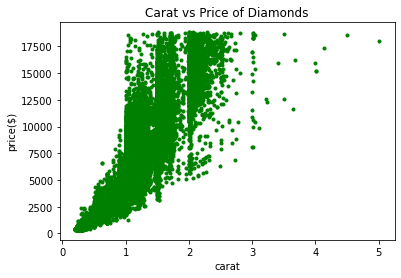

In [3]:
fig, ax = plt.subplots()
ax.scatter(df["carat"], df["price"], color = "g", marker = ".")
ax.set_xlabel("carat")
ax.set_ylabel("price($)")
ax.set_title("Carat vs Price of Diamonds")
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
x = df[['carat','cut_ord', 'clarity_ord']]
y = df.price
lm1 = LinearRegression()
lm1.fit(x,y)
print(lm1.intercept_)
print(lm1.coef_)

-5255.223146477377
[8363.41665765  160.37858283  457.80181294]


In [5]:
list(zip(['carat', 'cut', 'clarity'],lm1.coef_))

[('carat', 8363.416657653941),
 ('cut', 160.37858283100235),
 ('clarity', 457.8018129355186)]

In [6]:
df1.head(5)

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


In [7]:
x_test = df1[['carat','cut_ord', 'clarity_ord']]
pred = lm1.predict(x_test)
pred

array([6963.06494599, 5801.59390809, 3452.94749363, ..., 5380.90553136,
       2132.95253552, 5046.36886505])

In [8]:
df1['pred_price']= pred
df1.head(10)

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,pred_price
0,1,1.22,Premium,4,G,SI1,3,6963.064946
1,2,1.01,Good,2,G,VS2,5,5801.593908
2,3,0.71,Very Good,3,I,VS2,5,3452.947494
3,4,1.01,Ideal,5,D,SI2,2,4909.324218
4,5,0.27,Ideal,5,H,VVS2,6,551.603143
5,6,0.52,Premium,4,G,VS1,4,1566.475099
6,7,1.01,Premium,4,F,SI1,3,5206.747448
7,8,0.59,Ideal,5,D,SI1,3,1854.491035
8,9,1.01,Good,2,E,SI1,3,4885.990282
9,10,2.03,Ideal,5,F,SI2,2,13440.009209


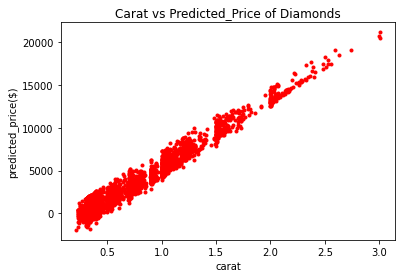

In [9]:
fig, ax = plt.subplots()
ax.scatter(df1["carat"], df1["pred_price"], color = "r", marker = ".")
ax.set_xlabel("carat")
ax.set_ylabel("predicted_price($)")
ax.set_title("Carat vs Predicted_Price of Diamonds")
plt.show()

In [10]:
sum_= df1['pred_price'].sum()
sum_

11730233.065594094

In [11]:
margin_=0.7*sum_
margin_

8211163.145915865

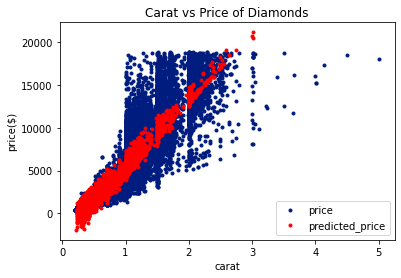

In [12]:
plt.style.use("seaborn-dark-palette")
fig, ax = plt.subplots()
ax.scatter(df["carat"], df["price"], marker = ".", label="price")
ax.scatter(df1["carat"], df1["pred_price"], color = "r", marker = ".", label="predicted_price")
ax.set_xlabel("carat")
ax.set_ylabel("price($)")
ax.set_title("Carat vs Price of Diamonds")
ax.legend()
plt.show()